# Data Analysis for Melbourne Houses
This data analysis project aims to conduct statistics and analysis of houses in the Melbourne area, digging into the relationship between different suburb, house properties, year of construction, sellers and other information and house prices, as well as possible time series based trend analysis and prediction of house prices. The analysis of this project will be based on time and space dimensions, statistical analysis and exploratory analysis of Melbourne houses, which will provide data support for the decision making of sellers, buyers, real estate agents and other stakeholders.

## Data Source
- melb_data.csv
- suburb-10-vic.geojson

## Changes Log
- 2023-01-05: started project

In [103]:
## load packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly

import warnings

warnings.filterwarnings('ignore')

In [53]:
## load data
file = '/Users/lq/PycharmProjects/DA_Course/DataSource/DataSource_Melbourne_house/melb_data.csv'
houses = pd.read_csv(file)

houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Step 1: Problem Statement and Usecases Analysis

### 1.1 Problem Statement

1. Research the current state of the housing market in Melbourne, including prices, house types and areas.

2. Understand the distribution of housing and the factors influencing the different levels of sparsity of housing in different areas.

3. Identify the best areas to invest in, sell and build homes by comparing and compiling statistics on the price differences between homes in different areas and properties.

4. Study housing market trends and forecast future price and type trends in the housing market.

### 1.2 Usecases (User Stories)
1. As a real estate agent, I want to be aware of trends in the Melbourne housing market, including changes in prices, house types and areas, so that I can provide a better service to my clients.

2. As a home buyer, I want to be able to know the trends in the Melbourne housing market, including how prices have changed over the last few years, so that I can decide whether to buy now.

3. As a home buyer, I want to be able to know the price differences between areas so that I can compare prices in different areas and choose the most affordable option.

4. As an investor, I want to be able to know the price difference between areas so that I can compare the return on investment in different areas and choose the best value option.

5. As a real estate agent, I want to be able to know the price differences between areas so that I can provide my clients with up-to-date information on the housing market and help them make informed decisions.

6. As a real estate agent, I want to be able to predict future developments in the housing market, including changes in price and demand, so that I can provide better service to my clients.

7. As a home buyer, I want to be able to predict future developments in the housing market so that I can decide whether to buy a home now.

## Step 2: Data Preprocessing

### 2.1 Data Overview

In [55]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [58]:
houses.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### 2.2 FillNa

In [62]:
columns_with_na = houses.columns[houses.isnull().any()]
houses_with_na = houses[columns_with_na]
houses_with_na

,Car,BuildingArea,YearBuilt,CouncilArea
0,1.0,NaN,NaN,Yarra
1,0.0,79.0,1900.0,Yarra
2,0.0,150.0,1900.0,Yarra
3,1.0,NaN,NaN,Yarra
4,2.0,142.0,2014.0,Yarra
...,...,...,...,...
13575,2.0,NaN,1981.0,NaN
13576,2.0,133.0,1995.0,NaN
13577,4.0,NaN,1997.0,NaN
13578,5.0,157.0,1920.0,NaN


In [73]:
houses_with_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           13518 non-null  float64
 1   BuildingArea  7130 non-null   float64
 2   YearBuilt     8205 non-null   float64
 3   CouncilArea   12211 non-null  object 
dtypes: float64(3), object(1)
memory usage: 424.5+ KB


In [134]:
## global setting of plot styles

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("deep")

#### 2.2.1 FillNa in Col Car
Check the percentage of null values in the car column and determine if the null values need to be filled by plotting the countplot and distplot.

<AxesSubplot:xlabel='Car', ylabel='count'>

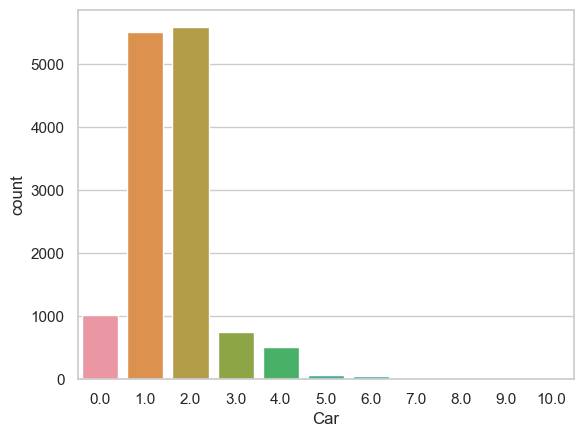

In [135]:
sns.countplot(x='Car', data=houses_with_na)

<AxesSubplot:xlabel='Car', ylabel='Density'>

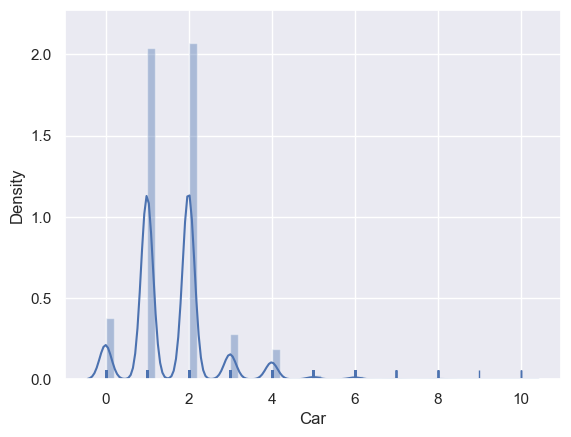

In [109]:
sns.distplot(houses_with_na['Car'], rug=True)

In [128]:
def plot_with_na_cols(colname):
    # make a plot with 2x2 subplots
    fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
    sns.countplot(x=colname, data=houses_with_na, ax=ax[0, 0])
    try:
        sns.distplot(houses_with_na[colname], rug=True, ax=ax[0, 1])
    except ValueError:
        pass
    sns.boxplot(x=colname, data=houses_with_na, ax=ax[1, 0])

    # remove all the x labels and y labels
    for i in ax.flat:
        i.set_xlabel('')
        i.set_ylabel('')

    # hide last empty subplot
    ax[1, 1].axis("off")

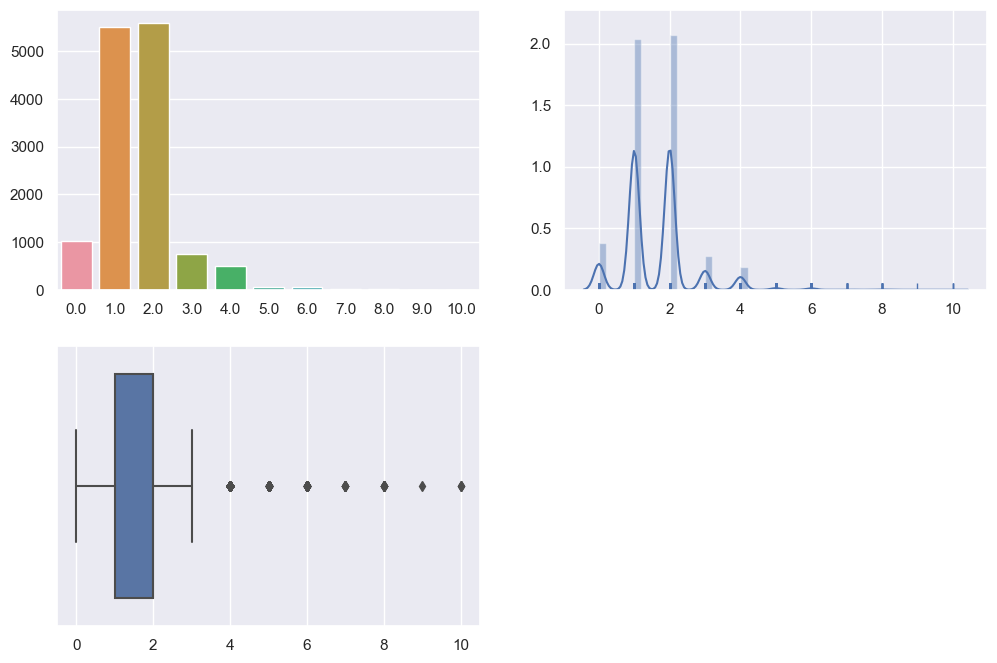

In [129]:
plot_with_na_cols('Car')

#### 2.2.2 FillNa in Col BuildingArea

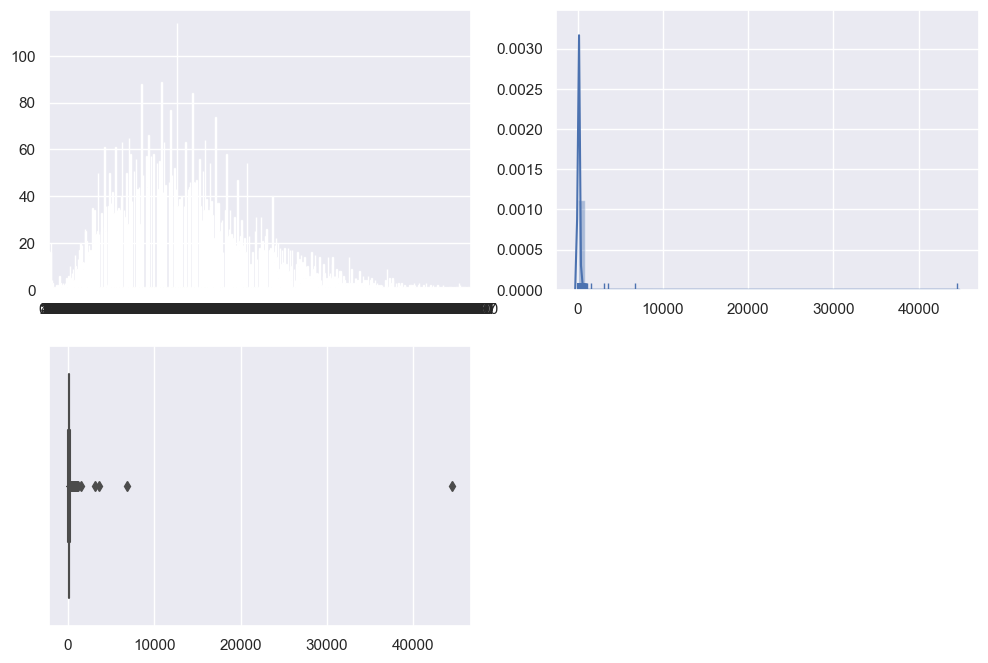

In [130]:
plot_with_na_cols('BuildingArea')

#### 2.2.3 FillNa in Col YearBuilt

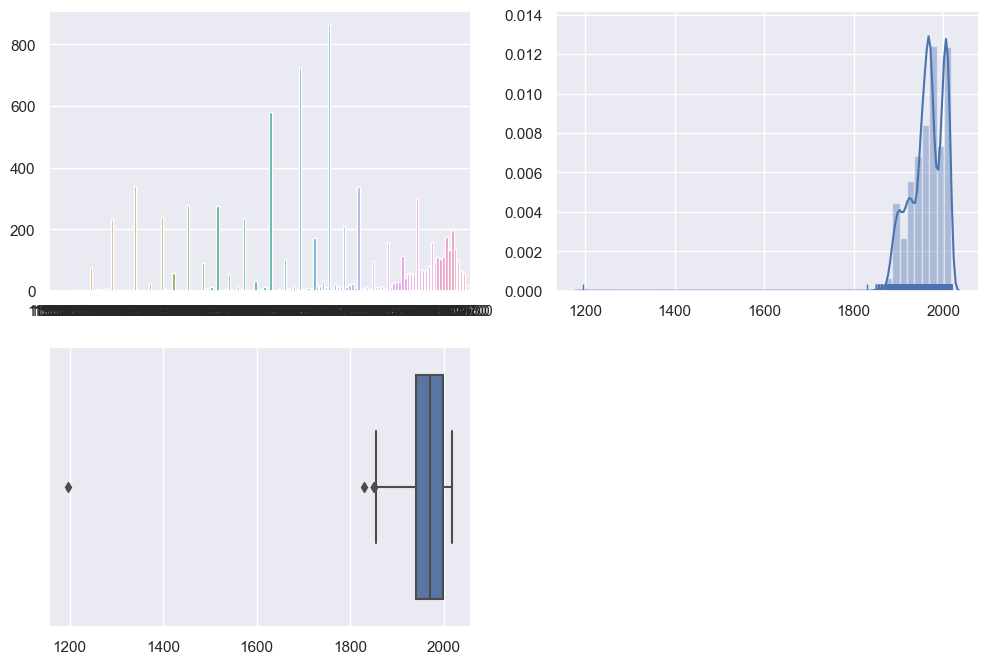

In [131]:
plot_with_na_cols('YearBuilt')

#### 2.2.4 FillNa in Col CouncilArea

In [133]:
# plot_with_na_cols('CouncilArea')

### 3. Datatype Cleanup

### 4. Save Preprocessed Data